In [1]:
!pip install pandas matplotlib seaborn wordcloud wandb

In [3]:
!wandb login

wandb: ERROR Find detailed error logs at: C:\Users\nesil\AppData\Local\Temp\debug-cli.nesil.log
Error: api_key not configured (no-tty). call wandb login [your_api_key]


1. Load Data & Basic Checks

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import os


# Load the dataset
df = pd.read_csv(r'C:\Users\nesil\Desktop\odtu-yuksek\DI725_termproject_2030336\data\RISCM\captions.csv')

# Display basic info
print("===== Dataset Info =====")
print(df.info())

# Check first 5 rows
print("\n===== First 5 Rows =====")
print(df.head())

# Check missing values
print("\n===== Missing Values =====")
print(df.isnull().sum())

===== Dataset Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44521 entries, 0 to 44520
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   source     44521 non-null  object
 1   split      44521 non-null  object
 2   image      44521 non-null  object
 3   caption_1  44521 non-null  object
 4   caption_2  44521 non-null  object
 5   caption_3  44521 non-null  object
 6   caption_4  44521 non-null  object
 7   caption_5  44521 non-null  object
dtypes: object(8)
memory usage: 2.7+ MB
None

===== First 5 Rows =====
  source split           image  \
0   NWPU  test  NWPU_31430.jpg   
1   NWPU  test  NWPU_31431.jpg   
2   NWPU  test  NWPU_31432.jpg   
3   NWPU  test  NWPU_31433.jpg   
4   NWPU  test  NWPU_31434.jpg   

                                           caption_1  \
0   A gray plane on the runway and the lawn beside .   
1  Three small planes parked in a line on the air...   
2  A plane parked in a line on th

2. Basic Statistics

In [6]:
import pandas as pd

# 1. First load the data
try:
    df = pd.read_csv(r'C:\Users\nesil\Desktop\odtu-yuksek\DI725_termproject_2030336\data\RISCM\captions.csv')
    print("Data loaded successfully!")
    
    # 2. Then run your statistics code
    print("\n===== Basic Statistics =====")
    print(f"Total Images: {df['image'].nunique()}")
    print(f"Sources: {df['source'].unique()}")
    print(f"Splits: {df['split'].unique()}")

    # Count of images per source & split
    print("\n===== Images per Source =====")
    print(df['source'].value_counts())

    print("\n===== Images per Split =====")
    print(df['split'].value_counts())

except FileNotFoundError:
    print("Error: CSV file not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully!

===== Basic Statistics =====
Total Images: 44521
Sources: ['NWPU' 'RSICD' 'UCM']
Splits: ['test' 'val' 'train']

===== Images per Source =====
NWPU     31500
RSICD    10921
UCM       2100
Name: source, dtype: int64

===== Images per Split =====
train    35614
test      4454
val       4453
Name: split, dtype: int64


3. Caption Length Analysis

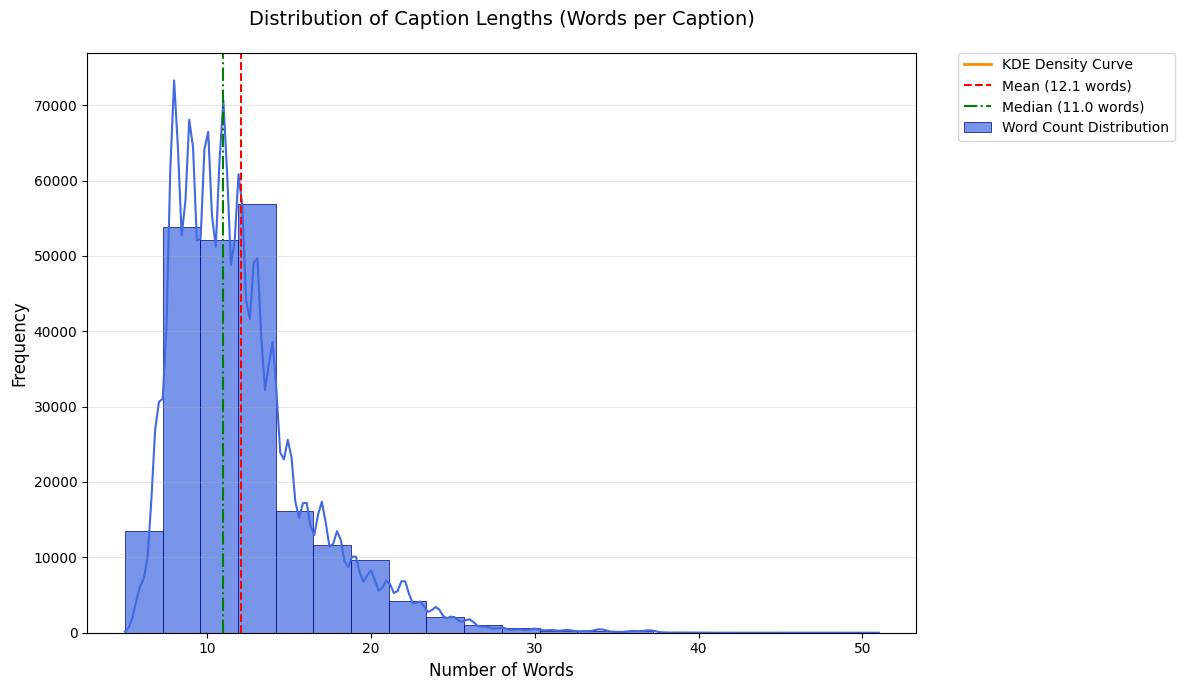


===== Caption Length Stats =====
Mean words per caption: 12.09
Median words per caption: 11.0
Max words in a caption: 51
Min words in a caption: 5
Total captions analyzed: 222605


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all captions into a single list
all_captions = []
for col in ['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5']:
    all_captions.extend(df[col].dropna().tolist())

# Calculate word counts
caption_lengths = [len(str(caption).split()) for caption in all_captions]

# Plot distribution with legend
plt.figure(figsize=(12, 7))
ax = sns.histplot(caption_lengths, bins=20, kde=True, color='royalblue', 
                 edgecolor='navy', linewidth=0.5, alpha=0.7,
                 label='Word Count Distribution')

# Add KDE curve to legend
plt.plot([], [], color='darkorange', linewidth=2, label='KDE Density Curve')
plt.title('Distribution of Caption Lengths (Words per Caption)', fontsize=14, pad=20)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add vertical lines for mean and median
mean_val = pd.Series(caption_lengths).mean()
median_val = pd.Series(caption_lengths).median()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, 
           label=f'Mean ({mean_val:.1f} words)')
plt.axvline(median_val, color='green', linestyle='-.', linewidth=1.5, 
           label=f'Median ({median_val} words)')

# Add legend with custom styling
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
                   borderaxespad=0., frameon=True, 
                   facecolor='white', framealpha=0.9)
legend.get_frame().set_edgecolor('lightgray')

plt.tight_layout()
plt.show()

# Summary stats
print("\n===== Caption Length Stats =====")
print(f"Mean words per caption: {mean_val:.2f}")
print(f"Median words per caption: {median_val}")
print(f"Max words in a caption: {max(caption_lengths)}")
print(f"Min words in a caption: {min(caption_lengths)}")
print(f"Total captions analyzed: {len(caption_lengths)}")

4. Word Frequency Analysis

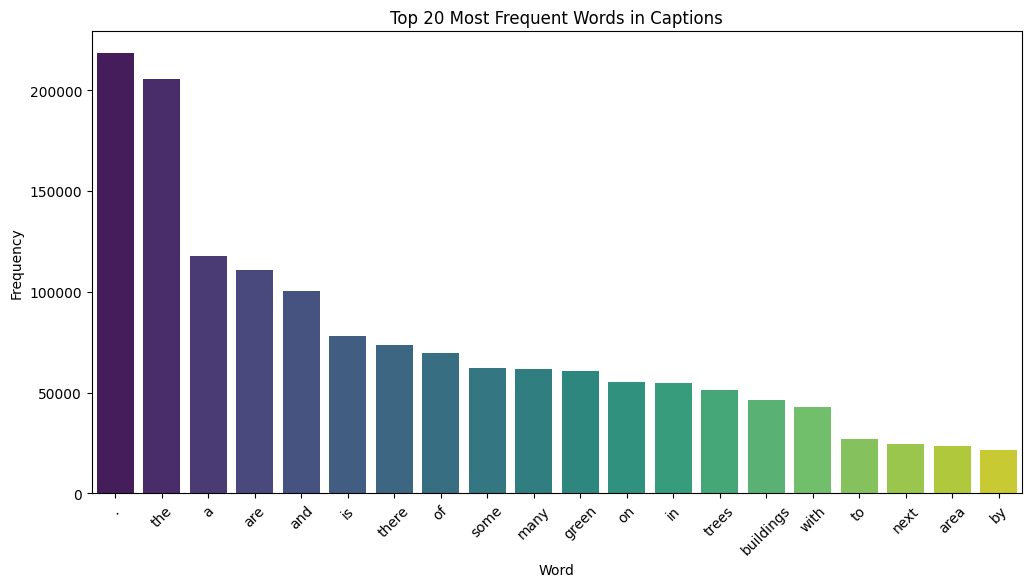

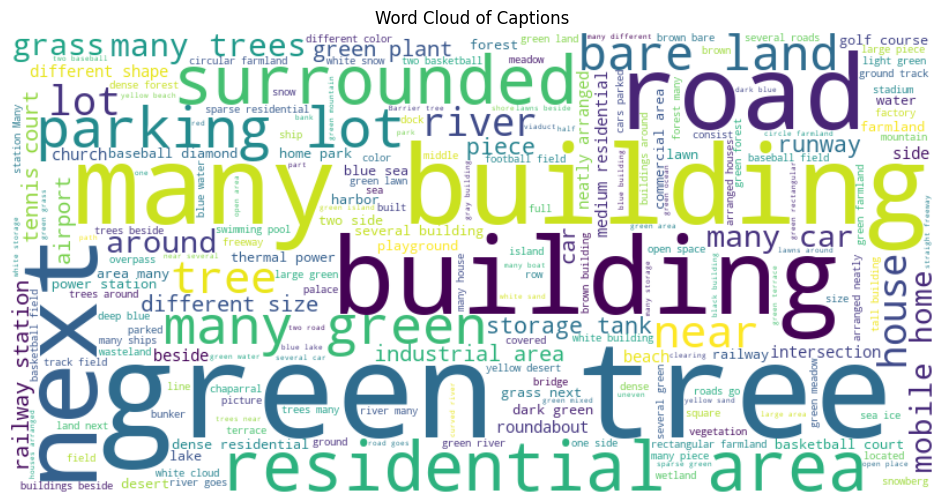

In [9]:
# Combine all captions into a single string
all_text = ' '.join(all_captions)

# Generate word frequencies
word_counts = Counter(all_text.lower().split())
top_words = word_counts.most_common(20)

# Plot top words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words], palette='viridis')
plt.title('Top 20 Most Frequent Words in Captions')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Captions')
plt.show()

5. Caption Similarity Analysis (Optional)

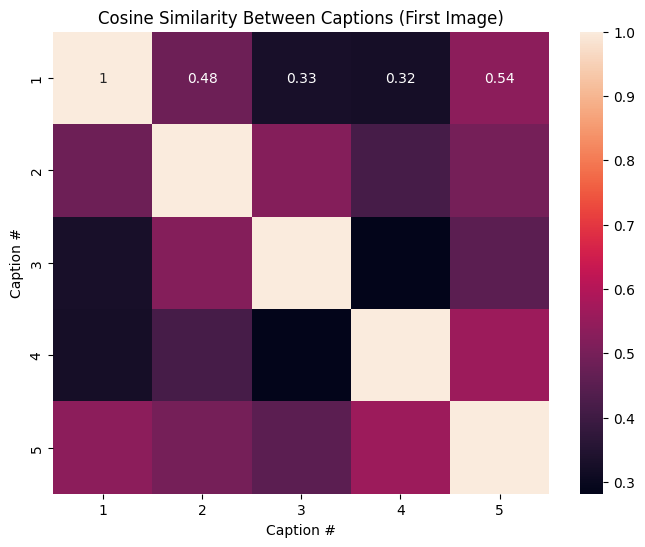

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Example: Compare captions for the first image
sample_captions = df.iloc[0][['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5']].tolist()

# Compute TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sample_captions)

# Compute pairwise cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Plot similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim, annot=True, xticklabels=range(1, 6), yticklabels=range(1, 6))
plt.title('Cosine Similarity Between Captions (First Image)')
plt.xlabel('Caption #')
plt.ylabel('Caption #')
plt.show()

Basic additionals for report

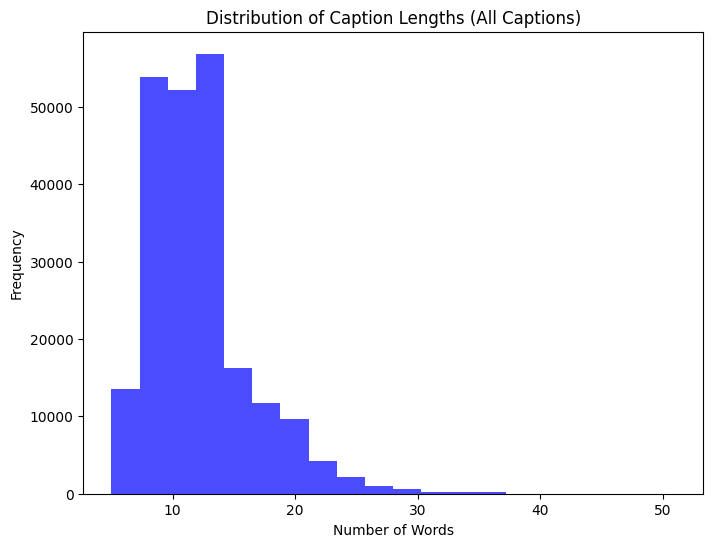

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r'C:\Users\nesil\Desktop\odtu-yuksek\DI725_termproject_2030336\data\RISCM\captions.csv')

# Combine all captions into a single list
all_captions = []
for col in ['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5']:
    all_captions.extend(df[col].tolist())

# Calculate word counts
caption_lengths = [len(str(caption).split()) for caption in all_captions]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(caption_lengths, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Caption Lengths (All Captions)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

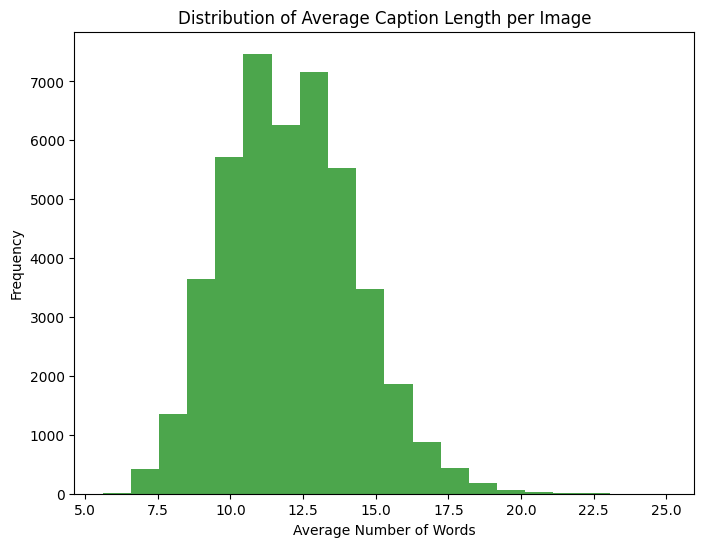

In [6]:
# Calculate average caption length per image
df['avg_caption_length'] = df[['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5']] \
    .apply(lambda row: sum(len(str(caption).split()) for caption in row) / 5, axis=1)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df['avg_caption_length'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Average Caption Length per Image')
plt.xlabel('Average Number of Words')
plt.ylabel('Frequency')
plt.show()

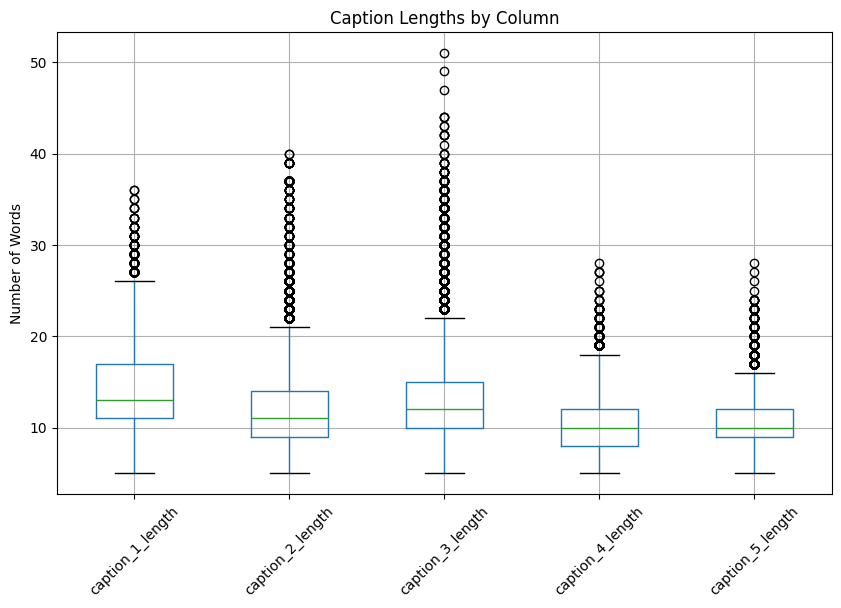

In [7]:
# Calculate word counts for each caption column
for col in ['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5']:
    df[f'{col}_length'] = df[col].apply(lambda x: len(str(x).split()))

# Plot boxplot for comparison
plt.figure(figsize=(10, 6))
df.boxplot(column=['caption_1_length', 'caption_2_length', 'caption_3_length', 'caption_4_length', 'caption_5_length'])
plt.title('Caption Lengths by Column')
plt.ylabel('Number of Words')
plt.xticks(rotation=45)
plt.show()